In [12]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving lr_test.csv to lr_test.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
diag = pd.read_csv(filename)
diag.head()

,diagnosis,radius_mean,texture_mean
0,M,17.99,10.38
1,M,20.57,17.77
2,M,19.69,21.25
3,M,11.42,20.38
4,M,20.29,14.34


In [14]:
diag['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [15]:
# 결측치 확인

diag.isnull().sum()

diagnosis       0
radius_mean     0
texture_mean    0
dtype: int64

In [16]:
X = diag.iloc[:, 1:]
y = diag.loc[:, 'diagnosis']

In [19]:
# 컬럼의 값이 다양해서 정규화 시켜줌 
# MinMax 사용
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [18]:
diag.head()

,diagnosis,radius_mean,texture_mean
0,M,17.99,10.38
1,M,20.57,17.77
2,M,19.69,21.25
3,M,11.42,20.38
4,M,20.29,14.34


In [21]:
# 테스트 사이즈만 지정해주면 트레인/테스트 데이터를 나눠줌
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# 트레인에 사용되지 않은 데이터로 성능을 확인해야 함

In [22]:
# 모델 빌딩, 트레이닝
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
# training the model
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 88.60%


Text(0.5, 1.0, 'Confusion Matrix')

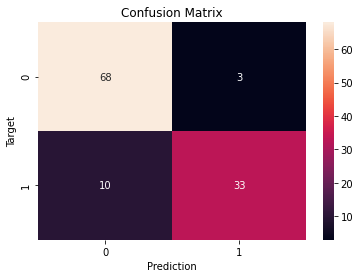

In [25]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns. heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')